In [1]:
from train_utils import Train

In [2]:
from model import SRResnet

In [3]:
architecture = SRResnet(3, 64)

In [4]:
params = {
    'noise_model': ('multiplicative_bernoulli', 0.8),
    'crop_size': 64,
    'clean_targs': False,
    'lr': 0.005,
    'epochs': 6,
    'bs': 32,
    'lossfn': 'l2',
    'cuda': True
}

In [5]:
trainer = Train(architecture, 'train-jpg/', 'dataset/train/', params)

In [ ]:
trainer.train()

  0%|          | 0/1265 [00:00<?, ?it/s]

Training loss = 
 42.6035
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, Validation loss = 
 0.4572
[torch.cuda.FloatTensor of size 1 (GPU 0)]



  0%|          | 0/1265 [00:00<?, ?it/s]

Training loss = 
 38.4311
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, Validation loss = 
 0.4487
[torch.cuda.FloatTensor of size 1 (GPU 0)]



  0%|          | 0/1265 [00:00<?, ?it/s]

Training loss = 
 38.3278
[torch.cuda.FloatTensor of size 1 (GPU 0)]
, Validation loss = 
 0.6341
[torch.cuda.FloatTensor of size 1 (GPU 0)]



 60%|█████▉    | 753/1265 [12:09<08:16,  1.03it/s]

In [28]:
m = trainer.architecture

In [29]:
from data import NoisyDataset

In [30]:
from torch.utils.data import DataLoader

In [41]:
data_ = NoisyDataset('dataset/valid/', crop_size=128, clean_targ=True, train_noise_model=('multiplicative_bernoulli', 0.5)) # Default gaussian noise without clean targets

In [42]:
dl = DataLoader(data_, batch_size=1, shuffle=True)

In [43]:
import matplotlib.pyplot as plt

In [44]:
import torch
import numpy as np
from torch.autograd import Variable

In [45]:
def show(img, a):
    plt.figure()
    if a == 'v':
        npimg = torch.squeeze(img).data.cpu().numpy()
    else:
        npimg = torch.squeeze(img).numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

<Figure size 432x288 with 0 Axes>

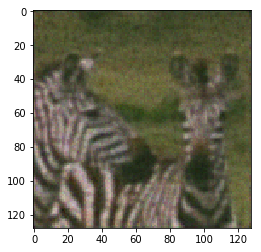

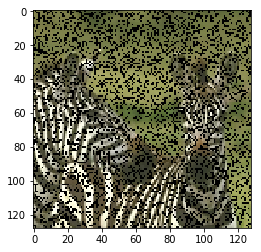

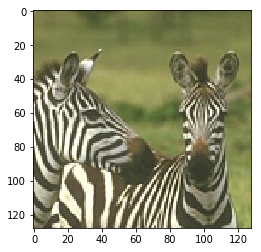

In [49]:
i = 0
for _list in dl:
    plt.figure()
    pred = m(Variable(_list[0].cuda()))
    show(pred, 'v')
    show(_list[0], 't')
    show(_list[-1], 't')
    if i == 0:
        break